## Load in all sonnets as text separated by double newlines

In [1]:
with open('Shakespeare_sonnets.txt','r',encoding='utf=8') as f:
    whole_text = f.read()

print(whole_text[:800])

From fairest creatures we desire increase,
That thereby beauty’s rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed’st thy light’s flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world’s fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak’st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world’s due, by the grave and thee.


When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty’s field,
Thy youth’s proud livery so gazed on now,
Will be a tattered weed of small worth held:
Then being 


### Get rid of most punctuation

Just leaving characters inside words, including apostrophes and hyphens

In [2]:
ss = whole_text.replace('.','').replace(',','').replace('?','').replace('!','').replace(':','').replace(';','').lower()
print(ss[:800])

from fairest creatures we desire increase
that thereby beauty’s rose might never die
but as the riper should by time decease
his tender heir might bear his memory
but thou contracted to thine own bright eyes
feed’st thy light’s flame with self-substantial fuel
making a famine where abundance lies
thy self thy foe to thy sweet self too cruel
thou that art now the world’s fresh ornament
and only herald to the gaudy spring
within thine own bud buriest thy content
and tender churl mak’st waste in niggarding
pity the world or else this glutton be
to eat the world’s due by the grave and thee


when forty winters shall besiege thy brow
and dig deep trenches in thy beauty’s field
thy youth’s proud livery so gazed on now
will be a tattered weed of small worth held
then being asked where all thy bea


### Splitting sonnets apart into list

In [3]:
ll = ss.split('\n\n')
ll[:2]

['from fairest creatures we desire increase\nthat thereby beauty’s rose might never die\nbut as the riper should by time decease\nhis tender heir might bear his memory\nbut thou contracted to thine own bright eyes\nfeed’st thy light’s flame with self-substantial fuel\nmaking a famine where abundance lies\nthy self thy foe to thy sweet self too cruel\nthou that art now the world’s fresh ornament\nand only herald to the gaudy spring\nwithin thine own bud buriest thy content\nand tender churl mak’st waste in niggarding\npity the world or else this glutton be\nto eat the world’s due by the grave and thee',
 '\nwhen forty winters shall besiege thy brow\nand dig deep trenches in thy beauty’s field\nthy youth’s proud livery so gazed on now\nwill be a tattered weed of small worth held\nthen being asked where all thy beauty lies\nwhere all the treasure of thy lusty days\nto say within thine own deep sunken eyes\nwere an all-eating shame and thriftless praise\nhow much more praise deserv’d thy b

## Final sonnet list

Replacing newilne characters with spaces

In [4]:
sonnets_list = [xx.replace('\n',' ') for xx in ll]
sonnets_list[:2]

['from fairest creatures we desire increase that thereby beauty’s rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feed’st thy light’s flame with self-substantial fuel making a famine where abundance lies thy self thy foe to thy sweet self too cruel thou that art now the world’s fresh ornament and only herald to the gaudy spring within thine own bud buriest thy content and tender churl mak’st waste in niggarding pity the world or else this glutton be to eat the world’s due by the grave and thee',
 ' when forty winters shall besiege thy brow and dig deep trenches in thy beauty’s field thy youth’s proud livery so gazed on now will be a tattered weed of small worth held then being asked where all thy beauty lies where all the treasure of thy lusty days to say within thine own deep sunken eyes were an all-eating shame and thriftless praise how much more praise deserv’d thy beauty’s use if thou co

### Testing splitting a sonnet by spaces

In [5]:
s0 = sonnets_list[1]
s0l = s0.split(' ')
s0l[:10]

['',
 'when',
 'forty',
 'winters',
 'shall',
 'besiege',
 'thy',
 'brow',
 'and',
 'dig']

### Figuring out how to count terms for one specific sonnet first

In [6]:
term_counts = {}
for term in s0l:
    if term in term_counts:
        term_counts[term] += 1
    else:
        term_counts[term] = 1
print(term_counts)

{'': 1, 'when': 3, 'forty': 1, 'winters': 1, 'shall': 2, 'besiege': 1, 'thy': 7, 'brow': 1, 'and': 4, 'dig': 1, 'deep': 2, 'trenches': 1, 'in': 1, 'beauty’s': 2, 'field': 1, 'youth’s': 1, 'proud': 1, 'livery': 1, 'so': 1, 'gazed': 1, 'on': 1, 'now': 1, 'will': 1, 'be': 2, 'a': 1, 'tattered': 1, 'weed': 1, 'of': 3, 'small': 1, 'worth': 1, 'held': 1, 'then': 1, 'being': 1, 'asked': 1, 'where': 2, 'all': 2, 'beauty': 2, 'lies': 1, 'the': 1, 'treasure': 1, 'lusty': 1, 'days': 1, 'to': 2, 'say': 1, 'within': 1, 'thine': 2, 'own': 1, 'sunken': 1, 'eyes': 1, 'were': 2, 'an': 1, 'all-eating': 1, 'shame': 1, 'thriftless': 1, 'praise': 2, 'how': 1, 'much': 1, 'more': 1, 'deserv’d': 1, 'use': 1, 'if': 1, 'thou': 3, 'couldst': 1, 'answer': 1, '‘this': 1, 'fair': 1, 'child': 1, 'mine': 1, 'sum': 1, 'my': 2, 'count': 1, 'make': 1, 'old': 2, 'excuse’': 1, 'proving': 1, 'his': 1, 'by': 1, 'succession': 1, 'this': 1, 'new': 1, 'made': 1, 'art': 1, 'see': 1, 'blood': 1, 'warm': 1, 'feel’st': 1, 'it': 1,

## Creating a function for term counting in general

In [7]:
def count_terms(text):
    term_list = text.split(' ')
    term_counts = {}
    for term in term_list:
        if term in term_counts:
            term_counts[term] += 1
        else:
            term_counts[term] = 1
    return term_counts

### Counting terms in all sonnets

Putting term count dictionaries in a list

In [8]:
counts_list = []
for sonnet in sonnets_list:
    s_counts = count_terms(sonnet)
    counts_list.append(s_counts)
print(counts_list[:2])

[{'from': 1, 'fairest': 1, 'creatures': 1, 'we': 1, 'desire': 1, 'increase': 1, 'that': 2, 'thereby': 1, 'beauty’s': 1, 'rose': 1, 'might': 2, 'never': 1, 'die': 1, 'but': 2, 'as': 1, 'the': 6, 'riper': 1, 'should': 1, 'by': 2, 'time': 1, 'decease': 1, 'his': 2, 'tender': 2, 'heir': 1, 'bear': 1, 'memory': 1, 'thou': 2, 'contracted': 1, 'to': 4, 'thine': 2, 'own': 2, 'bright': 1, 'eyes': 1, 'feed’st': 1, 'thy': 5, 'light’s': 1, 'flame': 1, 'with': 1, 'self-substantial': 1, 'fuel': 1, 'making': 1, 'a': 1, 'famine': 1, 'where': 1, 'abundance': 1, 'lies': 1, 'self': 2, 'foe': 1, 'sweet': 1, 'too': 1, 'cruel': 1, 'art': 1, 'now': 1, 'world’s': 2, 'fresh': 1, 'ornament': 1, 'and': 3, 'only': 1, 'herald': 1, 'gaudy': 1, 'spring': 1, 'within': 1, 'bud': 1, 'buriest': 1, 'content': 1, 'churl': 1, 'mak’st': 1, 'waste': 1, 'in': 1, 'niggarding': 1, 'pity': 1, 'world': 1, 'or': 1, 'else': 1, 'this': 1, 'glutton': 1, 'be': 1, 'eat': 1, 'due': 1, 'grave': 1, 'thee': 1}, {'': 1, 'when': 3, 'forty': 

### Abandoned example of normalizing counts

Since the sonnets are all about the same length, I'm not going to bother normalizing term counts

### Trying out a similarity score on a single pair of sonnets

In [9]:
c0 = counts_list[0]
tc = counts_list[1]

similarity = 0
for term,count in c0.items():
    if term in tc:
        similarity += count*tc[term]
print(similarity)

91


### Calculating similarity one compared to all others (including self)

In [10]:
c0 = counts_list[0]
c0_sims = []

for tc in counts_list:
    similarity = 0
    for term,count in c0.items():
        if term in tc:
            similarity += count*tc[term]
    c0_sims.append(similarity)
print(c0_sims)

[196, 91, 114, 86, 57, 73, 83, 65, 103, 104, 71, 89, 49, 83, 65, 56, 60, 79, 105, 71, 60, 67, 76, 97, 61, 66, 62, 94, 63, 62, 78, 67, 69, 99, 88, 50, 62, 91, 90, 60, 104, 53, 80, 56, 62, 110, 84, 65, 92, 89, 42, 80, 58, 66, 73, 82, 55, 50, 61, 94, 101, 44, 59, 85, 30, 53, 54, 63, 112, 91, 60, 51, 98, 96, 89, 55, 105, 88, 81, 62, 62, 64, 37, 52, 54, 51, 92, 85, 62, 67, 52, 97, 99, 85, 92, 93, 80, 72, 92, 90, 70, 64, 57, 43, 41, 63, 90, 82, 73, 64, 48, 61, 87, 76, 56, 71, 65, 70, 50, 56, 52, 87, 93, 53, 60, 58, 40, 84, 75, 52, 100, 100, 81, 91, 95, 93, 88, 54, 71, 62, 69, 76, 77, 56, 48, 70, 68, 50, 73, 94, 66, 91, 59, 65]


### We can use a built-in function to get the maximum similarity (will be self)

In [11]:
max(c0_sims)

196

### Making a list of (normalized simiarity, index) tuples

We'll use this to sort by similarity but keep track of original sonnet index. Since we'll want to sort by simlarity, we'll put that first in the tuple.

In [12]:
c0_id_sims = [(round(xx/max(c0_sims),2),ii) for ii,xx in enumerate(c0_sims)]
print(c0_id_sims)

[(1.0, 0), (0.46, 1), (0.58, 2), (0.44, 3), (0.29, 4), (0.37, 5), (0.42, 6), (0.33, 7), (0.53, 8), (0.53, 9), (0.36, 10), (0.45, 11), (0.25, 12), (0.42, 13), (0.33, 14), (0.29, 15), (0.31, 16), (0.4, 17), (0.54, 18), (0.36, 19), (0.31, 20), (0.34, 21), (0.39, 22), (0.49, 23), (0.31, 24), (0.34, 25), (0.32, 26), (0.48, 27), (0.32, 28), (0.32, 29), (0.4, 30), (0.34, 31), (0.35, 32), (0.51, 33), (0.45, 34), (0.26, 35), (0.32, 36), (0.46, 37), (0.46, 38), (0.31, 39), (0.53, 40), (0.27, 41), (0.41, 42), (0.29, 43), (0.32, 44), (0.56, 45), (0.43, 46), (0.33, 47), (0.47, 48), (0.45, 49), (0.21, 50), (0.41, 51), (0.3, 52), (0.34, 53), (0.37, 54), (0.42, 55), (0.28, 56), (0.26, 57), (0.31, 58), (0.48, 59), (0.52, 60), (0.22, 61), (0.3, 62), (0.43, 63), (0.15, 64), (0.27, 65), (0.28, 66), (0.32, 67), (0.57, 68), (0.46, 69), (0.31, 70), (0.26, 71), (0.5, 72), (0.49, 73), (0.45, 74), (0.28, 75), (0.54, 76), (0.45, 77), (0.41, 78), (0.32, 79), (0.32, 80), (0.33, 81), (0.19, 82), (0.27, 83), (0.28, 

### Sort by similarity

- Ascending is the default, so for descending we need to include `reverse=True`
- If we had similarity as the second element of the tuple, we'd need to supply a `key=lambda x:x[1]` function for `sorted()` to use for the sort "key"

In [13]:
sorted_sims0 = sorted(c0_id_sims, reverse=True)
print(sorted_sims0)

[(1.0, 0), (0.58, 2), (0.57, 68), (0.56, 45), (0.54, 76), (0.54, 18), (0.53, 40), (0.53, 9), (0.53, 8), (0.52, 60), (0.51, 131), (0.51, 130), (0.51, 92), (0.51, 33), (0.5, 72), (0.49, 91), (0.49, 73), (0.49, 23), (0.48, 149), (0.48, 134), (0.48, 59), (0.48, 27), (0.47, 135), (0.47, 122), (0.47, 98), (0.47, 95), (0.47, 94), (0.47, 86), (0.47, 48), (0.46, 151), (0.46, 133), (0.46, 106), (0.46, 99), (0.46, 69), (0.46, 38), (0.46, 37), (0.46, 1), (0.45, 136), (0.45, 77), (0.45, 74), (0.45, 49), (0.45, 34), (0.45, 11), (0.44, 121), (0.44, 112), (0.44, 3), (0.43, 127), (0.43, 93), (0.43, 87), (0.43, 63), (0.43, 46), (0.42, 107), (0.42, 55), (0.42, 13), (0.42, 6), (0.41, 132), (0.41, 96), (0.41, 78), (0.41, 51), (0.41, 42), (0.4, 30), (0.4, 17), (0.39, 142), (0.39, 141), (0.39, 113), (0.39, 22), (0.38, 128), (0.37, 148), (0.37, 108), (0.37, 97), (0.37, 54), (0.37, 5), (0.36, 145), (0.36, 138), (0.36, 117), (0.36, 115), (0.36, 100), (0.36, 19), (0.36, 10), (0.35, 146), (0.35, 140), (0.35, 32),

### Compare two original texts

In [14]:
originals = whole_text.split('\n\n')

print(originals[0],'\n',originals[64])

From fairest creatures we desire increase,
That thereby beauty’s rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed’st thy light’s flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world’s fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak’st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world’s due, by the grave and thee. 
 
Since brass, nor stone, nor earth, nor boundless sea,
But sad mortality o’ersways their power,
How with this rage shall beauty hold a plea,
Whose action is no stronger than a flower?
O how shall summer’s honey breath hold out,
Against the wrackful siege of batt’ring days,
When rocks impregnable are not so stout,
Nor gates of steel so strong but time decays?
O fearful meditation, whe

## Create a function with compares an individual to all the rest

- Returns sorted list of tuples. 
- Rounding similarities to two digits.

In [8]:
a= {'apple': 10, 'potato':5, 'banana': 2, 'treefrog':20}
b={'apple': 10, 'potato':5, 'banana': 2}

In [15]:
similarity=100
for term,count in a.items():
    if term in b:
        similarity -= (count/sum(a.values()))-(b[term]/sum(b.values()))

In [16]:
similarity

100.54054054054053

In [12]:
similarity=100
for term,count in b.items():
    if term in a:
        similarity += (count/sum(b.values()))-(a[term]/sum(a.values()))

In [13]:
similarity

100.54054054054053

In [4]:
similarity=0
for term,count in a.items():
    if term in b:
        similarity += count*b[term]

In [5]:
similarity

129

In [6]:
similarity=0
for term,count in b.items():
    if term in a:
        similarity += count*a[term]

In [7]:
similarity

129

In [15]:
def similarity_to_rest(indiv_counts, all_counts_list):
    sims_list = []
    for tc in all_counts_list:
        similarity = 0
        for term,count in indiv_counts.items():
            if term in tc:
                similarity += count*tc[term]
        sims_list.append(similarity)
    max_sim = max(sims_list)
    norm_sims_id_list = [(round(xx/max_sim,2),ii) for ii,xx in enumerate(sims_list)]
    return sorted(norm_sims_id_list, reverse=True)

### Compare all pairs

In [16]:
similarity_list = []
for term_count in counts_list:
    similarity_list.append(similarity_to_rest(term_count, counts_list))

### View some output

Choose a specific sonnet index and see what the most and least similar other sonnets

In [17]:
print(similarity_list[0])

[(1.0, 0), (0.58, 2), (0.57, 68), (0.56, 45), (0.54, 76), (0.54, 18), (0.53, 40), (0.53, 9), (0.53, 8), (0.52, 60), (0.51, 131), (0.51, 130), (0.51, 92), (0.51, 33), (0.5, 72), (0.49, 91), (0.49, 73), (0.49, 23), (0.48, 149), (0.48, 134), (0.48, 59), (0.48, 27), (0.47, 135), (0.47, 122), (0.47, 98), (0.47, 95), (0.47, 94), (0.47, 86), (0.47, 48), (0.46, 151), (0.46, 133), (0.46, 106), (0.46, 99), (0.46, 69), (0.46, 38), (0.46, 37), (0.46, 1), (0.45, 136), (0.45, 77), (0.45, 74), (0.45, 49), (0.45, 34), (0.45, 11), (0.44, 121), (0.44, 112), (0.44, 3), (0.43, 127), (0.43, 93), (0.43, 87), (0.43, 63), (0.43, 46), (0.42, 107), (0.42, 55), (0.42, 13), (0.42, 6), (0.41, 132), (0.41, 96), (0.41, 78), (0.41, 51), (0.41, 42), (0.4, 30), (0.4, 17), (0.39, 142), (0.39, 141), (0.39, 113), (0.39, 22), (0.38, 128), (0.37, 148), (0.37, 108), (0.37, 97), (0.37, 54), (0.37, 5), (0.36, 145), (0.36, 138), (0.36, 117), (0.36, 115), (0.36, 100), (0.36, 19), (0.36, 10), (0.35, 146), (0.35, 140), (0.35, 32),

### Playing with how can compare top words in each pair

Here, since we're sorting by the second item in each pair, we need to supply `sorted()` with a `key=` function to explain how to access the sorting "key"

In [18]:
s125 = sorted(counts_list[125].items(), key=lambda item: item[1], reverse=True)
s97 = sorted(counts_list[97].items(), key=lambda item: item[1], reverse=True)
list(zip(s125,s97))

[(('her', 6), ('in', 6)),
 (('thou', 3), ('the', 6)),
 (('thy', 3), ('of', 5)),
 (('and', 3), ('you', 4)),
 (('thee', 3), ('nor', 4)),
 (('o', 2), ('i', 3)),
 (('who', 2), ('and', 3)),
 (('fickle', 2), ('with', 3)),
 (('as', 2), ('from', 2)),
 (('still', 2), ('all', 2)),
 (('she', 2), ('yet', 2)),
 (('to', 2), ('sweet', 2)),
 (('may', 2), ('they', 2)),
 (('', 1), ('did', 2)),
 (('my', 1), ('but', 2)),
 (('lovely', 1), ('', 1)),
 (('boy', 1), ('have', 1)),
 (('in', 1), ('been', 1)),
 (('power', 1), ('absent', 1)),
 (('dost', 1), ('spring', 1)),
 (('hold', 1), ('when', 1)),
 (('time’s', 1), ('proud-pied', 1)),
 (('glass', 1), ('april', 1)),
 (('his', 1), ('(dressed', 1)),
 (('hour', 1), ('his', 1)),
 (('hast', 1), ('trim)', 1)),
 (('by', 1), ('hath', 1)),
 (('waning', 1), ('put', 1)),
 (('grown', 1), ('a', 1)),
 (('therein', 1), ('spirit', 1)),
 (('show’st', 1), ('youth', 1)),
 (('lovers', 1), ('every', 1)),
 (('withering', 1), ('thing', 1)),
 (('sweet', 1), ('that', 1)),
 (('self', 1), 

## Ignore "stopwords" to avoid counts of unimportant terms

- The more we pare down to more interesting terms, the more meaningful the similarity scores will be
- What are considered stopwords depends on the application, or the distinctions you want to make
- **This shows a good example of using `continue`**

In [19]:
def count_nonstop_terms(text):
    stoplist = ['','the','and','a']
    term_list = text.split(' ')
    term_counts = {}
    for term in term_list:
        if term in stoplist:
            continue
        if term in term_counts:
            term_counts[term] += 1
        else:
            term_counts[term] = 1
    return term_counts

### Redo counts dictionaries, now ignoring stopwords

In [20]:
counts_nonstop_list = []
for sonnet in sonnets_list:
    s_counts = count_nonstop_terms(sonnet)
    counts_nonstop_list.append(s_counts)
print(counts_nonstop_list[:2])

[{'from': 1, 'fairest': 1, 'creatures': 1, 'we': 1, 'desire': 1, 'increase': 1, 'that': 2, 'thereby': 1, 'beauty’s': 1, 'rose': 1, 'might': 2, 'never': 1, 'die': 1, 'but': 2, 'as': 1, 'riper': 1, 'should': 1, 'by': 2, 'time': 1, 'decease': 1, 'his': 2, 'tender': 2, 'heir': 1, 'bear': 1, 'memory': 1, 'thou': 2, 'contracted': 1, 'to': 4, 'thine': 2, 'own': 2, 'bright': 1, 'eyes': 1, 'feed’st': 1, 'thy': 5, 'light’s': 1, 'flame': 1, 'with': 1, 'self-substantial': 1, 'fuel': 1, 'making': 1, 'famine': 1, 'where': 1, 'abundance': 1, 'lies': 1, 'self': 2, 'foe': 1, 'sweet': 1, 'too': 1, 'cruel': 1, 'art': 1, 'now': 1, 'world’s': 2, 'fresh': 1, 'ornament': 1, 'only': 1, 'herald': 1, 'gaudy': 1, 'spring': 1, 'within': 1, 'bud': 1, 'buriest': 1, 'content': 1, 'churl': 1, 'mak’st': 1, 'waste': 1, 'in': 1, 'niggarding': 1, 'pity': 1, 'world': 1, 'or': 1, 'else': 1, 'this': 1, 'glutton': 1, 'be': 1, 'eat': 1, 'due': 1, 'grave': 1, 'thee': 1}, {'when': 3, 'forty': 1, 'winters': 1, 'shall': 2, 'besie

### Simiarities of all pairs, now ignoring stopwords

In [21]:
similarity_ns_list = []
for term_count in counts_nonstop_list:
    similarity_ns_list.append(similarity_to_rest(term_count, counts_nonstop_list))

In [22]:
print(similarity_ns_list[4])

[(1.0, 4), (0.49, 20), (0.48, 123), (0.46, 97), (0.42, 147), (0.42, 126), (0.4, 140), (0.39, 101), (0.39, 91), (0.39, 53), (0.39, 46), (0.38, 105), (0.37, 68), (0.37, 25), (0.36, 135), (0.36, 112), (0.36, 93), (0.35, 134), (0.35, 108), (0.35, 72), (0.35, 38), (0.35, 16), (0.34, 138), (0.34, 131), (0.34, 14), (0.34, 8), (0.33, 115), (0.33, 85), (0.33, 83), (0.33, 78), (0.33, 73), (0.33, 49), (0.32, 133), (0.32, 102), (0.32, 67), (0.32, 32), (0.32, 28), (0.32, 23), (0.31, 149), (0.31, 117), (0.31, 113), (0.31, 94), (0.31, 70), (0.31, 35), (0.31, 24), (0.31, 22), (0.31, 9), (0.3, 144), (0.3, 110), (0.3, 107), (0.3, 60), (0.3, 57), (0.3, 31), (0.3, 30), (0.3, 21), (0.29, 121), (0.29, 100), (0.29, 56), (0.29, 48), (0.28, 141), (0.28, 127), (0.28, 92), (0.28, 90), (0.28, 63), (0.28, 59), (0.28, 44), (0.28, 43), (0.27, 150), (0.27, 148), (0.27, 136), (0.27, 132), (0.27, 120), (0.27, 114), (0.27, 98), (0.27, 96), (0.27, 66), (0.27, 64), (0.27, 61), (0.27, 55), (0.27, 52), (0.27, 45), (0.27, 40

In [23]:
s_a = sorted(counts_nonstop_list[4].items(), key=lambda item: item[1], reverse=True)
s_b = sorted(counts_nonstop_list[65].items(), key=lambda item: item[1], reverse=True)
list(zip(s_a,s_b))[:10]

[(('with', 4), ('these', 3)),
 (('that', 2), ('i', 3)),
 (('where', 2), ('tired', 2)),
 (('every', 2), ('with', 2)),
 (('doth', 2), ('all', 2)),
 (('to', 2), ('to', 2)),
 (('winter', 2), ('by', 2)),
 (('beauty', 2), ('for', 1)),
 (('were', 2), ('restful', 1)),
 (('nor', 2), ('death', 1))]

## Want to better visualize overlap

In [24]:
def overlap_terms(index_a, index_b):
    c_a = counts_nonstop_list[index_a]
    c_b = counts_nonstop_list[index_b]
    only_a = []
    only_b = []
    both_ab = []
    for term,count in c_a.items():
        if term in c_b:
            both_ab.append(((term,count),(term,c_b[term])))
        else:
            only_a.append((term,count))
    for term,count in c_b.items():
        if term not in c_a:
            only_b.append((term,count))
    # sorting overlapped terms by the sum of the frequencies
    both_sorted = sorted(both_ab, key=lambda x:x[0][1]+x[1][1], reverse=True)
    a_sorted = sorted(only_a, key=lambda x:x[1], reverse=True)
    b_sorted = sorted(only_b, key=lambda x:x[1], reverse=True)
    # Just returning the first 15 of each non-overlap list
    return [('a','b')] + both_sorted + [('a','b')] + list(zip(a_sorted,b_sorted))[:15]

In [25]:
overlap_terms(0,2)

[('a', 'b'),
 (('thy', 5), ('thy', 4)),
 (('thou', 2), ('thou', 6)),
 (('to', 4), ('to', 2)),
 (('thine', 2), ('thine', 2)),
 (('that', 2), ('that', 1)),
 (('but', 2), ('but', 1)),
 (('time', 1), ('time', 2)),
 (('his', 2), ('his', 1)),
 (('now', 1), ('now', 2)),
 (('in', 1), ('in', 2)),
 (('be', 1), ('be', 2)),
 (('thee', 1), ('thee', 2)),
 (('die', 1), ('die', 1)),
 (('should', 1), ('should', 1)),
 (('with', 1), ('with', 1)),
 (('where', 1), ('where', 1)),
 (('art', 1), ('art', 1)),
 (('fresh', 1), ('fresh', 1)),
 (('world', 1), ('world', 1)),
 (('or', 1), ('or', 1)),
 (('this', 1), ('this', 1)),
 ('a', 'b'),
 (('might', 2), ('of', 5)),
 (('by', 2), ('is', 3)),
 (('tender', 2), ('so', 3)),
 (('own', 2), ('glass', 2)),
 (('self', 2), ('face', 2)),
 (('world’s', 2), ('whose', 2)),
 (('from', 1), ('if', 2)),
 (('fairest', 1), ('not', 2)),
 (('creatures', 1), ('she', 2)),
 (('we', 1), ('look', 1)),
 (('desire', 1), ('tell', 1)),
 (('increase', 1), ('viewest', 1)),
 (('thereby', 1), ('for

In [26]:
overlap_terms(0,65)

[('a', 'b'),
 (('to', 4), ('to', 2)),
 (('by', 2), ('by', 2)),
 (('that', 2), ('that', 1)),
 (('with', 1), ('with', 2)),
 (('from', 1), ('from', 1)),
 (('die', 1), ('die', 1)),
 (('as', 1), ('as', 1)),
 (('art', 1), ('art', 1)),
 (('in', 1), ('in', 1)),
 (('be', 1), ('be', 1)),
 ('a', 'b'),
 (('thy', 5), ('these', 3)),
 (('might', 2), ('i', 3)),
 (('but', 2), ('tired', 2)),
 (('his', 2), ('all', 2)),
 (('tender', 2), ('for', 1)),
 (('thou', 2), ('restful', 1)),
 (('thine', 2), ('death', 1)),
 (('own', 2), ('cry', 1)),
 (('self', 2), ('behold', 1)),
 (('world’s', 2), ('desert', 1)),
 (('fairest', 1), ('beggar', 1)),
 (('creatures', 1), ('born', 1)),
 (('we', 1), ('needy', 1)),
 (('desire', 1), ('nothing', 1)),
 (('increase', 1), ('trimmed', 1))]

## Want to visualize the whole matrix

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Earlier similarities were sorted and with index

Here we want to return all pairwise similarities, but we'll keep them in the original index order

In [36]:
def similarity_matrix(all_counts_list):
    all_sims_list = []
    for indiv_counts in all_counts_list:
        sims_list = []
        for tc in all_counts_list:
            similarity = 0
            for term,count in indiv_counts.items():
                if term in tc:
                    similarity += count*tc[term]
            sims_list.append(similarity)
        max_sim = max(sims_list)
        norm_sims_id_list = [round(xx/max_sim,2) for xx in sims_list]
        all_sims_list.append(norm_sims_id_list)
    return all_sims_list

### This is just the similarity matrix between all pairs

In [37]:
only_sims_list = similarity_matrix(counts_nonstop_list)

In [38]:
sim_ns_array = np.array(only_sims_list)

### In index order (so diagonal is identity)

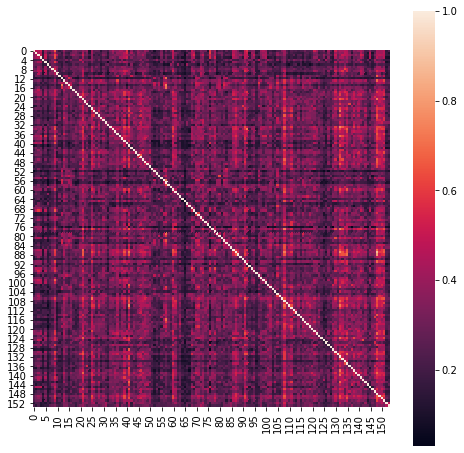

In [46]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(sim_ns_array, square=True)

### Clustered

There do seem to be some clusters of sonnets that come out here

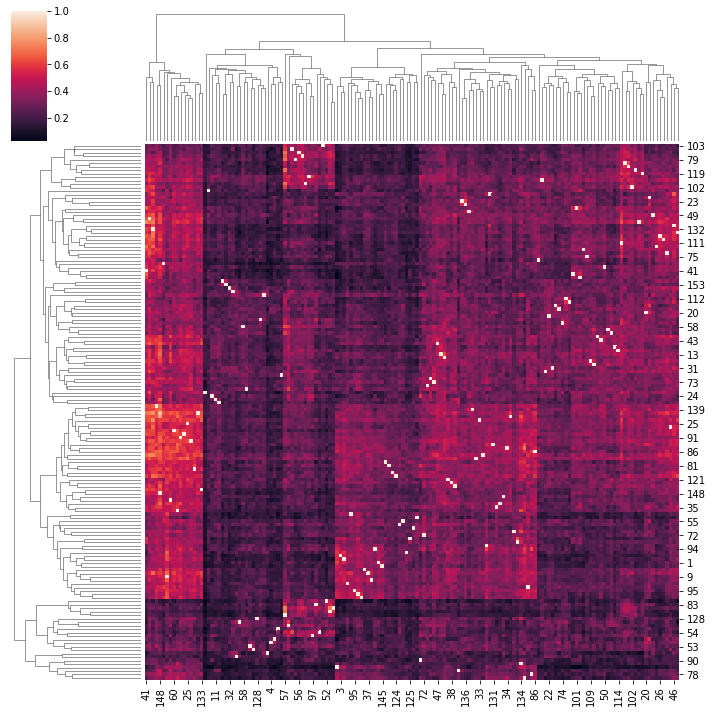

In [42]:
g = sns.clustermap(sim_ns_array)